In [6]:
!pip install pyswarms

     |████████████████████████████████| 104 kB 27.3 MB/s 


In [8]:
import time
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from google.colab import files
import scipy.optimize as opt
import pyswarms as pso
plt.rcParams.update({'font.size': 18})

In [ ]:
#seeding
random.seed(111)
np.random.seed(111)

x_k = []
y_k = []
delta_k = []

#x_k array generating
for k in range (1001):
    x_k.append(3*k/1000)
x_k = np.array(x_k)
#delta_k array generating
delta_k = np.random.normal(0,1,1001)
delta_k = np.array(delta_k)

#y_k array generating

for i in range(1001):
  if (1 / (x_k[i] ** 2 - 3 * x_k[i] + 2)) < -100:
      y_k.append(-100 + delta_k[i])
  elif (1 / (x_k[i] ** 2 - 3 * x_k[i] + 2)) > 100:
      y_k.append(100 + delta_k[i])
  else:
      y_k.append((1 / (x_k[i] ** 2 - 3 * x_k[i] + 2)) + delta_k[i])

y_k = np.array(y_k)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]


Nedler-Mead algorithm [-0.72740756  0.72811538 -2.00292281  1.00293393]
Levenberg-Marquardt algorithm [-2.67152057  1.29791307  0.73440805  0.99489837]
Differential evolution algorithm [0.02240125 0.18353364 2.98765115 0.2385353 ]
Simulated annealing [0.         0.13563865 0.         0.13807752]


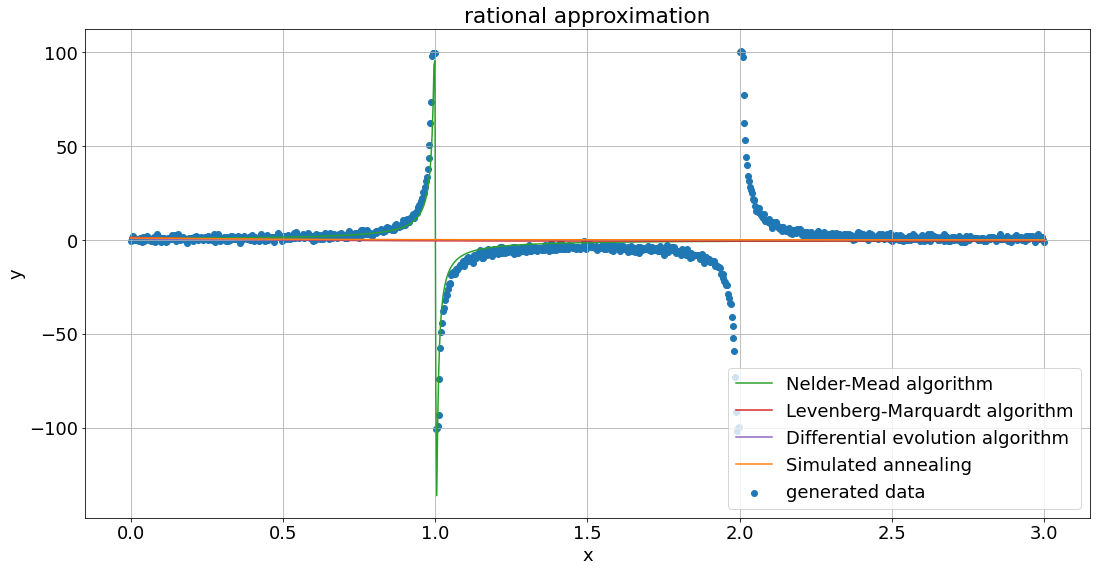

In [ ]:
#rational approximation

#functions for optimizations
def rational(x, a, b, c, d): #F(x_k, a, b, c, d)
    return (a * x + b) / (x ** 2 + c * x + d)

def least_squares(params): #D(a, b, c, d)
    a, b, c, d = params
    global x_k, y_k
    global rational
    return np.sum((rational(x_k, a, b, c, d) - y_k) ** 2)

def least_squares_lm(params): #D(a, b, c, d) for lm method
    a, b, c, d = params
    global x_k, y_k
    global rational
    return (rational(x_k, a, b, c, d) - y_k)

initial_guess = [1, 1, 1, 1]

#Nedler-Mead algorithm
a0 = opt.minimize(least_squares, initial_guess, method='Nelder-Mead', tol = 0.001)

#Levenberg-Marquardt algorithm
a1 = opt.least_squares(least_squares_lm, [0.01, 0.01, 0.01, 0.01], method='lm', ftol = 0.001, xtol = 0.001)

#Differential evolution algorithm
a2 = opt.differential_evolution(least_squares, [(0,3), (0,3), (0,3), (0,3)], maxiter = 1000, tol = 0.001)

#Simulated annealing
a3 = opt.dual_annealing(least_squares, [(0,3), (0,3), (0,3), (0,3)], maxiter = 1000)

print('Nedler-Mead algorithm', a0.x)
print('Levenberg-Marquardt algorithm', a1.x)
print('Differential evolution algorithm', a2.x)
print('Simulated annealing', a3.x)

#plotting the results
plt.figure(figsize=(18, 9))
plt.scatter(x_k, y_k, label='generated data')
plt.plot(x_k, ((a0['x'][0] * x_k + a0['x'][1]) / (x_k ** 2 + x_k * a0['x'][2] + a0['x'][3])), label='Nelder-Mead algorithm', color = 'tab:green')
plt.plot(x_k, ((a1['x'][0] * x_k + a1['x'][1]) / (x_k ** 2 + x_k * a1['x'][2] + a1['x'][3])), label='Levenberg-Marquardt algorithm', color = 'tab:red')
plt.plot(x_k, ((a2['x'][0] * x_k + a2['x'][1]) / (x_k ** 2 + x_k * a2['x'][2] + a2['x'][3])), label='Differential evolution algorithm', color = 'tab:purple')
plt.plot(x_k, ((a3['x'][0] * x_k + a3['x'][1]) / (x_k ** 2 + x_k * a3['x'][2] + a3['x'][3])), label='Simulated annealing', color = 'tab:orange')
plt.title("rational approximation")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.savefig('1.png')
plt.show()
#files.download("1.png")